# Arulin Vs. Novadra: Clinical Trial Analysis

## Gather

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [63]:
patients = pd.read_csv("patients.csv")
treatments = pd.concat([pd.read_csv("treatments.csv"), pd.read_csv("treatments_cut.csv")])
reactions = pd.read_csv("adverse_reactions.csv")


In [64]:
patients.sample(5)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
380,381,female,Silje,Kristiansen,4992 Moonlight Drive,Pleasantville,NJ,8232.0,United States,SiljeAKristiansen@dayrep.com609-641-2070,2/7/1996,162.4,64,27.9
425,426,female,Taylah,Mobourne,995 Beechwood Avenue,Weehawken,NJ,7087.0,United States,908-751-4255TaylahMobourne@rhyta.com,7/4/1961,188.5,67,29.5
448,449,male,Ivan,Fomin,632 Peaceful Lane,Garfield Heights,OH,44128.0,United States,216-502-3773IvanFomin@dayrep.com,6/10/1930,139.9,65,23.3
480,481,male,Nasser,Mansour,547 Weekley Street,San Antonio,TX,78212.0,United States,NasserMazinMansour@fleckens.hu1 210 326 5509,3/25/1938,183.5,66,29.6
379,380,female,Rovzan,Kishiev,4220 Simpson Square,Sulphur,OK,73086.0,United States,580-622-5674RovzanKishiev@armyspy.com,7/13/1982,136.0,63,24.1


In [65]:
treatments.sample(5)

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
197,angelico,marchesi,-,58u - 58u,7.62,7.18,NaN
115,xiuxiu,chang,32u - 41u,-,7.64,7.23,NaN
138,giovana,rocha,-,23u - 21u,7.87,7.38,0.99
125,marcel,peters,48u - 60u,-,9.56,9.19,0.37
140,jesse,luoma,-,39u - 37u,7.72,7.35,NaN


In [66]:
reactions.sample(5)

,given_name,surname,adverse_reaction
23,merci,leroux,hypoglycemia
32,cecilie,nilsen,hypoglycemia
29,alex,crawford,hypoglycemia
12,abdul-nur,isa,hypoglycemia
28,xiuxiu,chang,hypoglycemia


## Assess

In [67]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id    503 non-null    int64  
 1   assigned_sex  503 non-null    object 
 2   given_name    503 non-null    object 
 3   surname       503 non-null    object 
 4   address       491 non-null    object 
 5   city          491 non-null    object 
 6   state         491 non-null    object 
 7   zip_code      491 non-null    float64
 8   country       491 non-null    object 
 9   contact       491 non-null    object 
 10  birthdate     503 non-null    object 
 11  weight        503 non-null    float64
 12  height        503 non-null    int64  
 13  bmi           503 non-null    float64
dtypes: float64(3), int64(2), object(9)
memory usage: 55.1+ KB


In [68]:
patients[["weight", "height", "bmi"]].describe()

,weight,height,bmi
count,503.000000,503.000000,503.000000
mean,173.434990,66.634195,27.483897
std,33.916741,4.411297,5.276438
min,48.800000,27.000000,17.100000
25%,149.300000,63.000000,23.300000
50%,175.300000,67.000000,27.200000
75%,199.500000,70.000000,31.750000
max,255.900000,79.000000,37.700000


In [69]:
mask = patients["weight"] < 100
patients[mask]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
210,211,female,Camilla,Zaitseva,4689 Briarhill Lane,Wooster,OH,44691.0,United States,330-202-2145CamillaZaitseva@superrito.com,11/26/1938,48.8,63,19.1


In [70]:
mask = patients["height"] < 50
patients[mask]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1


In [71]:
patients.duplicated().sum()

0

In [72]:
patients.duplicated(subset=["surname"]).sum()

37

In [73]:
mask = patients.duplicated(subset=["surname"])
patients[mask]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
26,27,female,Ella,Lund,1207 Garfield Road,Peoria,IL,61602.0,United States,309-671-8852EllaLund@armyspy.com,12/19/1933,144.8,61,27.4
29,30,male,Jake,Jakobsen,648 Old Dear Lane,Port Jervis,New York,12771.0,United States,JakobCJakobsen@einrot.com+1 (845) 858-7707,8/1/1985,155.8,67,24.4
122,123,male,Bội,Tạ,2389 Rubaiyat Road,Grand Rapids,MI,49503.0,United States,TaHaBoi@superrito.com231-607-3625,5/30/1929,211.0,69,31.2
139,140,female,Novalie,Berg,1275 Goldie Lane,Cincinnati,OH,45202.0,United States,NovalieBerg@gustr.com+1 (513) 383-0516,4/22/1973,156.9,61,29.6
194,195,male,Urso,Aranda,1330 Lincoln Street,Hopewell Mercer,NJ,8525.0,United States,609-466-3275UrsoArandaSanchez@rhyta.com,7/3/1999,163.7,70,23.5
195,196,female,Lamara,Dratchev,3731 Swick Hill Street,New Orleans,LA,70113.0,United States,985-253-7891LamaraDratchev@teleworm.us,10/20/1954,181.3,67,28.4
203,204,female,Mùi,Lương,1778 Rodney Street,Harvester,MO,63301.0,United States,636-442-6946LuongHongMui@einrot.com,2/29/1956,192.7,60,37.6
205,206,male,Breno,Correia,3539 Bottom Lane,Tonawanda,New York,14150.0,United States,716-743-5884BrenoLimaCorreia@superrito.com,7/11/1974,180.6,67,28.3
207,208,female,Beatrycze,Woźniak,182 Cross Street,Saginaw,MI,48607.0,United States,989-936-4563BeatryczeWozniak@armyspy.com,3/14/1946,119.2,61,22.5
229,230,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4


In [74]:
patients.duplicated(subset=["contact"]).sum()

19

In [75]:
mask = patients.duplicated(subset=["contact"], keep=False)
patients.dropna(subset=["contact"])[mask]

<ipython-input-75-2ffeb6f84185>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  patients.dropna(subset=["contact"])[mask]


,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
24,25,male,Jakob,Jakobsen,648 Old Dear Lane,Port Jervis,New York,12771.0,United States,JakobCJakobsen@einrot.com+1 (845) 858-7707,8/1/1985,155.8,67,24.4
29,30,male,Jake,Jakobsen,648 Old Dear Lane,Port Jervis,New York,12771.0,United States,JakobCJakobsen@einrot.com+1 (845) 858-7707,8/1/1985,155.8,67,24.4
97,98,male,Patrick,Gersten,2778 North Avenue,Burr,NE,68324.0,United States,PatrickGersten@rhyta.com402-848-4923,5/3/1954,138.2,71,19.3
131,132,female,Sandra,Taylor,2476 Fulton Street,Rainelle,WV,25962.0,United States,304-438-2648SandraCTaylor@dayrep.com,10/23/1960,206.1,64,35.4
215,216,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
229,230,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
237,238,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
244,245,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
251,252,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
277,278,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4


In [76]:
patients["state"].value_counts()

California    36
TX            32
New York      25
CA            24
MA            22
NY            22
PA            18
GA            15
OH            14
Illinois      14
Florida       13
MI            13
OK            13
LA            13
NJ            12
VA            11
WI            10
IL            10
MS            10
MN             9
AL             9
TN             9
FL             9
IN             9
KY             8
WA             8
NC             8
MO             7
ID             6
KS             6
NV             6
IA             5
CT             5
SC             5
RI             4
AR             4
AZ             4
CO             4
ME             4
Nebraska       4
ND             4
SD             3
OR             3
DE             3
WV             3
MD             3
DC             2
VT             2
NE             2
MT             2
AK             1
NM             1
WY             1
NH             1
Name: state, dtype: int64

In [77]:
patients.isnull().sum()

patient_id       0
assigned_sex     0
given_name       0
surname          0
address         12
city            12
state           12
zip_code        12
country         12
contact         12
birthdate        0
weight           0
height           0
bmi              0
dtype: int64

In [78]:
treatments.isnull().sum()

given_name        0
surname           0
auralin           0
novodra           0
hba1c_start       0
hba1c_end         0
hba1c_change    137
dtype: int64

In [79]:
treatments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 69
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   given_name    350 non-null    object 
 1   surname       350 non-null    object 
 2   auralin       350 non-null    object 
 3   novodra       350 non-null    object 
 4   hba1c_start   350 non-null    float64
 5   hba1c_end     350 non-null    float64
 6   hba1c_change  213 non-null    float64
dtypes: float64(3), object(4)
memory usage: 21.9+ KB


In [80]:
treatments.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32


In [81]:
treatments.duplicated().sum()

1

In [82]:
treatments.duplicated(subset=["surname"]).sum()

17

In [83]:
mask = treatments.duplicated(subset=["surname"], keep=False)
treatments[mask].sort_values("surname")

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
19,noe,aranda,26u - 34u,-,7.51,7.17,0.34
132,urso,aranda,30u - 38u,-,7.60,7.16,NaN
49,satsita,batukayev,-,42u - 42u,7.63,7.25,0.38
226,daud,batukayev,-,37u - 30u,7.98,7.51,0.97
199,novalie,berg,-,32u - 31u,7.85,7.49,0.36
24,isac,berg,31u - 41u,-,9.68,9.29,0.39
219,diệt,bùi,-,30u - 32u,9.11,8.76,0.35
184,chân,bùi,31u - 42u,-,7.53,7.18,0.35
13,bernarda,cindrić,40u - 49u,-,7.89,7.55,0.34
150,manuela,cindrić,55u - 66u,-,8.07,7.76,0.31


In [84]:
reactions.head()

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation


In [85]:
reactions.isnull().sum()

given_name          0
surname             0
adverse_reaction    0
dtype: int64

In [86]:
reactions.duplicated().sum()

0

#### Assess:
   - `patients` table:
       - `patient_id` and `zip_code` should be str
       - `birthdate` is str
       - `weight` and `height` are in unfamiliar units
       - inaccurate value for `weight` for patient_id 211
       - inaccurate value for `height` for patient_id 5
       - `contact` columns has two data email and number
       - duplicated patient 'John Doe'
       - null values in columns `address`, `city`, `state`, `zip_code`, `country`, `contact`
       - duplication for patient_ids (25, 30), (98, 503), (132, 283)
       - in consistent names in `state` column
       - `given_name` and `surname` should be lower case
       
    
   - `treatments` table
       - column `hba1c_change` has missing values
       - columns `auralin` and `novodra` have two values start and end dose
       - patient 'joseph day' is duplicated
       - 
   - `reactions` table

## Clean

#### Define:
   - convert `patient_id` and `zip_code` to str

#### Code

In [87]:
patients["patient_id"] = patients["patient_id"].astype(str)
patients["zip_code"] = patients["zip_code"].astype(str)

#### Test

In [88]:
patients[["patient_id", "zip_code"]].dtypes

patient_id    object
zip_code      object
dtype: object

#### Define
   - convert `birthdate` to datetime

#### Clean & Test

In [89]:
patients["birthdate"] = pd.to_datetime(patients["birthdate"])
patients[["birthdate"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   birthdate  503 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.1 KB


#### Define
   - convert weight for lbs to kg and convert height from inches to cm and recaculate bmi

#### Clean & Test

In [90]:
patients["weight"] = patients["weight"] * 0.453592
patients["height"] = patients["height"] * 2.45
patients[["weight", "height"]].describe()

,weight,height
count,503.000000,503.000000
mean,78.668724,163.253777
std,15.384363,10.807679
min,22.135290,66.150000
25%,67.721286,154.350000
50%,79.514678,164.150000
75%,90.491604,171.500000
max,116.074193,193.550000


In [94]:
patients["bmi"] = patients["weight"] / (patients["height"] / 100) ** 2
patients["bmi"].describe()

count    503.000000
mean      29.862869
std        9.493900
min        9.291203
25%       25.020495
50%       29.243157
75%       34.178927
max      199.335649
Name: bmi, dtype: float64

#### Define 
   - drop rows number 5 and 211, because of invalid data

#### Clean & Test

In [100]:
patients.drop(index=[4, 210], inplace=True)
patients.shape

(501, 14)

#### Define
   - separate mobile and email from the column `contact`

#### Clean & Test

In [111]:
patients["mobile"] = patients["contact"].str.extract("(1? ?\d{3}[- ]\d{3}[- ]\d{4}|\+1 \(\d{3}\) \d{3}-\d{4}|\d{10})")
patients["email"] = patients["contact"].str.replace("(1? ?\d{3}[- ]\d{3}[- ]\d{4}|\+1 \(\d{3}\) \d{3}-\d{4}|\d{10})", "")

patients[["contact", "mobile", "email"]].sample(5)

,contact,mobile,email
492,714-496-2264TarPoldi@superrito.com,714-496-2264,TarPoldi@superrito.com
328,AnjaHueber@teleworm.us+1 (612) 342-6065,+1 (612) 342-6065,AnjaHueber@teleworm.us
500,816-223-6007JinkedeKeizer@teleworm.us,816-223-6007,JinkedeKeizer@teleworm.us
135,Willem-JanvanderLubbe@gustr.com440-385-5011,440-385-5011,Willem-JanvanderLubbe@gustr.com
383,TorbenMMortensen@einrot.com1 208 657 2473,1 208 657 2473,TorbenMMortensen@einrot.com


#### Define:
   - remove duplicated patient 'John Doe'

#### Clean & Test

In [112]:
patients.drop_duplicates(subset=["given_name", "surname"], inplace=True)

mask = (patients["given_name"] == "John") & (patients["surname"] == "Doe")
patients[mask]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi,mobile,email
215,216,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1975-01-01,81.64656,176.4,26.238604,1234567890,johndoe@email.com


#### Define:
   - remove other duplicated patients, patient_ids (25, 30), (98, 503), (132, 283)
   - ie.: drop rows 29 and 282

#### Clean & Test

In [120]:
mask = patients["patient_id"].isin(["25", "30", "98", "503", "132", "283"])
patients[mask]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi,mobile,email
24,25,male,Jakob,Jakobsen,648 Old Dear Lane,Port Jervis,New York,12771.0,United States,JakobCJakobsen@einrot.com+1 (845) 858-7707,1985-08-01,70.669634,164.15,26.227148,+1 (845) 858-7707,JakobCJakobsen@einrot.com
29,30,male,Jake,Jakobsen,648 Old Dear Lane,Port Jervis,New York,12771.0,United States,JakobCJakobsen@einrot.com+1 (845) 858-7707,1985-08-01,70.669634,164.15,26.227148,+1 (845) 858-7707,JakobCJakobsen@einrot.com
97,98,male,Patrick,Gersten,2778 North Avenue,Burr,NE,68324.0,United States,PatrickGersten@rhyta.com402-848-4923,1954-05-03,62.686414,173.95,20.716890,402-848-4923,PatrickGersten@rhyta.com
131,132,female,Sandra,Taylor,2476 Fulton Street,Rainelle,WV,25962.0,United States,304-438-2648SandraCTaylor@dayrep.com,1960-10-23,93.485311,156.80,38.023427,304-438-2648,SandraCTaylor@dayrep.com
282,283,female,Sandy,Taylor,2476 Fulton Street,Rainelle,WV,25962.0,United States,304-438-2648SandraCTaylor@dayrep.com,1960-10-23,93.485311,156.80,38.023427,304-438-2648,SandraCTaylor@dayrep.com
502,503,male,Pat,Gersten,2778 North Avenue,Burr,Nebraska,68324.0,United States,PatrickGersten@rhyta.com402-848-4923,1954-05-03,62.686414,173.95,20.716890,402-848-4923,PatrickGersten@rhyta.com


In [119]:
mask = treatments["given_name"].isin(['jakob', 'jake', 'patrick', 'sandra', 'sandy', 'pat'])
treatments[mask]

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
158,sandy,gunnarsson,-,41u - 44u,7.97,7.45,NaN
229,sandra,taylor,51u - 58u,-,7.84,7.49,0.35
66,jakob,jakobsen,-,28u - 26u,7.96,7.51,0.95


In [122]:
patients.drop(index=[29, 282], inplace=True)

mask = patients["patient_id"].isin(["25", "30", "98", "503", "132", "283"])
patients[mask]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi,mobile,email
24,25,male,Jakob,Jakobsen,648 Old Dear Lane,Port Jervis,New York,12771.0,United States,JakobCJakobsen@einrot.com+1 (845) 858-7707,1985-08-01,70.669634,164.15,26.227148,+1 (845) 858-7707,JakobCJakobsen@einrot.com
97,98,male,Patrick,Gersten,2778 North Avenue,Burr,NE,68324.0,United States,PatrickGersten@rhyta.com402-848-4923,1954-05-03,62.686414,173.95,20.716890,402-848-4923,PatrickGersten@rhyta.com
131,132,female,Sandra,Taylor,2476 Fulton Street,Rainelle,WV,25962.0,United States,304-438-2648SandraCTaylor@dayrep.com,1960-10-23,93.485311,156.80,38.023427,304-438-2648,SandraCTaylor@dayrep.com
502,503,male,Pat,Gersten,2778 North Avenue,Burr,Nebraska,68324.0,United States,PatrickGersten@rhyta.com402-848-4923,1954-05-03,62.686414,173.95,20.716890,402-848-4923,PatrickGersten@rhyta.com


#### Define:
   - convert the long name of states to the appreviation

#### Clean & Test

In [126]:
long_to_short = {
    "California": "CA",
    "New York": "NY",
    "Illinois": "IL",
    "Florida": "FL",
    "Nebraska": "NE"
}
patients["state"].replace(long_to_short, inplace=True)

patients["state"].value_counts()

CA    60
NY    41
TX    32
IL    24
MA    22
FL    22
PA    18
GA    15
MI    13
OK    13
LA    13
OH    13
NJ    12
VA    11
MS    10
WI    10
TN     9
MN     9
IN     9
AL     8
NC     8
WA     8
KY     8
MO     7
KS     6
ID     6
NV     6
NE     6
IA     5
SC     5
CT     5
CO     4
ND     4
ME     4
RI     4
AR     4
AZ     4
MD     3
SD     3
DE     3
OR     3
VT     2
DC     2
WV     2
MT     2
AK     1
NM     1
NH     1
WY     1
Name: state, dtype: int64

#### Define:
   - convert `given_name` and `surname` to lowercase

In [127]:
patients["given_name"] = patients["given_name"].str.lower()
patients["surname"] = patients["surname"].str.lower()

patients.sample(5)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi,mobile,email
270,271,female,jowita,wiśniewska,2168 Butternut Lane,Granite City,IL,62040.0,United States,JowitaWisniewska@armyspy.com+1 (618) 512-3319,1934-11-08,49.033295,149.45,21.953271,+1 (618) 512-3319,JowitaWisniewska@armyspy.com
75,76,male,leo,mancini,1813 Lindale Avenue,Fremont,CA,94538.0,United States,LeoMancini@rhyta.com+1 (510) 498-6624,1964-09-26,88.495799,166.60,31.883990,+1 (510) 498-6624,LeoMancini@rhyta.com
202,203,female,jiřina,šubrtová,4262 Heron Way,Portland,OR,97204.0,United States,JirinaSubrtova@rhyta.com503-820-7877,1987-12-10,62.777133,149.45,28.106686,503-820-7877,JirinaSubrtova@rhyta.com
224,225,female,veronika,jindrová,3641 Selah Way,Brattleboro,VT,5301.0,United States,802-614-0812VeronikaJindrova@jourrapide.com,1981-01-15,77.745669,151.90,33.694627,802-614-0812,VeronikaJindrova@jourrapide.com
315,316,male,brancaleone,russo,2074 Parrish Avenue,San Antonio,TX,78217.0,United States,BrancaleoneRusso@jourrapide.com+1 (830) 851-4280,1997-06-20,96.116145,181.30,29.241573,+1 (830) 851-4280,BrancaleoneRusso@jourrapide.com


#### Define:
   - recalculate the column `hba1c_change`

#### Clean & Test

In [129]:
treatments["hba1c_change"] = np.abs(treatments["hba1c_end"] - treatments["hba1c_start"])

print(treatments["hba1c_change"].isnull().sum())
treatments

0


,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,0.43
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.47
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,0.43
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32
...,...,...,...,...,...,...,...
65,rovzan,kishiev,32u - 37u,-,7.75,7.41,0.34
66,jakob,jakobsen,-,28u - 26u,7.96,7.51,0.45
67,bernd,schneider,48u - 56u,-,7.74,7.44,0.30
68,berta,napolitani,-,42u - 44u,7.68,7.21,0.47


#### Define:
   - compine columns `auralin` and `novodra`

#### Clean & Test

In [132]:
treatments = treatments.melt(id_vars=["given_name", "surname", "hba1c_start", "hba1c_end", "hba1c_change"],
                value_vars=["auralin", "novodra"]
               , var_name="treatment", value_name="dose").replace("-", np.nan).dropna()
treatments

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u - 48u
3,skye,gormanston,7.97,7.62,0.35,auralin,33u - 36u
6,sophia,haugen,7.65,7.27,0.38,auralin,37u - 42u
7,eddie,archer,7.89,7.55,0.34,auralin,31u - 38u
9,asia,woźniak,7.76,7.37,0.39,auralin,30u - 36u
...,...,...,...,...,...,...,...
688,christopher,woodward,7.51,7.06,0.45,novodra,55u - 51u
690,maret,sultygov,7.67,7.30,0.37,novodra,26u - 23u
694,lixue,hsueh,9.21,8.80,0.41,novodra,22u - 23u
696,jakob,jakobsen,7.96,7.51,0.45,novodra,28u - 26u


#### Define:
   - separate start and end dose in the `dose` column

#### Clean & Test

In [138]:
new_columns = treatments["dose"].str.extract("(?P<start_dose>\d+)u - (?P<end_dose>\d+)u")
treatments = treatments.join(new_columns).drop(columns=["dose"])

treatments

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,start_dose,end_dose
0,veronika,jindrová,7.63,7.20,0.43,auralin,41,48
3,skye,gormanston,7.97,7.62,0.35,auralin,33,36
6,sophia,haugen,7.65,7.27,0.38,auralin,37,42
7,eddie,archer,7.89,7.55,0.34,auralin,31,38
9,asia,woźniak,7.76,7.37,0.39,auralin,30,36
...,...,...,...,...,...,...,...,...
688,christopher,woodward,7.51,7.06,0.45,novodra,55,51
690,maret,sultygov,7.67,7.30,0.37,novodra,26,23
694,lixue,hsueh,9.21,8.80,0.41,novodra,22,23
696,jakob,jakobsen,7.96,7.51,0.45,novodra,28,26


#### Define:
   - remove duplicated rows

#### Clean & Test

In [141]:
treatments.drop_duplicates(subset=["given_name", "surname"], inplace=True)

mask = treatments.duplicated(subset=["given_name", "surname"], keep=False)
treatments[mask]

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,start_dose,end_dose


#### Define:
   - join the two tables `treatments` and `reactions`

#### Clean & Test

In [148]:
treatments = treatments.merge(reactions, on=["given_name", "surname"], how="left").fillna("no-reaction")
treatments

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,start_dose,end_dose,adverse_reaction
0,veronika,jindrová,7.63,7.20,0.43,auralin,41,48,no-reaction
1,skye,gormanston,7.97,7.62,0.35,auralin,33,36,no-reaction
2,sophia,haugen,7.65,7.27,0.38,auralin,37,42,no-reaction
3,eddie,archer,7.89,7.55,0.34,auralin,31,38,no-reaction
4,asia,woźniak,7.76,7.37,0.39,auralin,30,36,no-reaction
...,...,...,...,...,...,...,...,...,...
344,christopher,woodward,7.51,7.06,0.45,novodra,55,51,nausea
345,maret,sultygov,7.67,7.30,0.37,novodra,26,23,no-reaction
346,lixue,hsueh,9.21,8.80,0.41,novodra,22,23,injection site discomfort
347,jakob,jakobsen,7.96,7.51,0.45,novodra,28,26,hypoglycemia


## Visualization

Text(0, 0.5, 'Average Change')

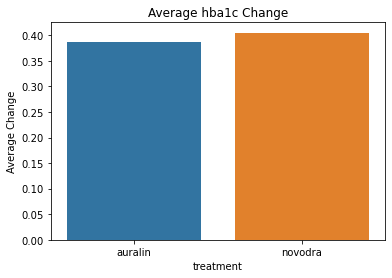

In [151]:
temp = treatments.groupby("treatment")["hba1c_change"].mean()

sns.barplot(x=temp.index, y=temp.values)
plt.title("Average hba1c Change")
plt.ylabel("Average Change")

Text(0, 0.5, 'Percentage')

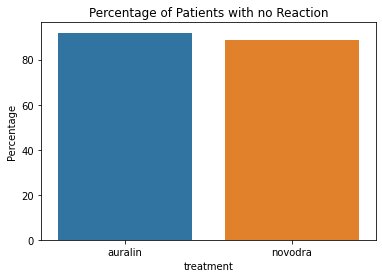

In [155]:
temp = treatments.groupby("treatment").apply(lambda g: (g["adverse_reaction"] == "no-reaction").sum() / g.shape[0] * 100)
sns.barplot(x=temp.index, y=temp.values)
plt.title("Percentage of Patients with no Reaction")
plt.ylabel("Percentage")

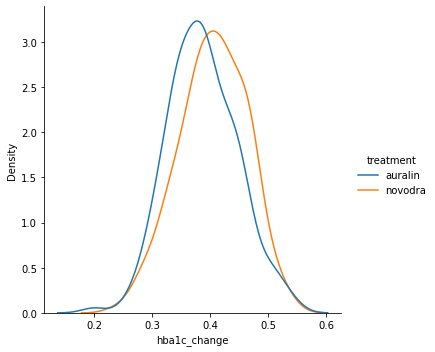

In [157]:
sns.displot(x=treatments["hba1c_change"], hue=treatments["treatment"], kind="kde")